In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.manifold import TSNE
from scipy.spatial import procrustes
from scipy.spatial.distance import jensenshannon


plt.style.use('ggplot')

data=pd.read_csv('combined_data_with_loc.csv')
#load feature category mapping
feature_category_dict=json.load(open('feature_category_dict.json'))
data.head()

,Community Name,Region,Map reference,Grid reference,Location,Population Density,Travel time to GPO (minutes),Distance to GPO (km),LGA,Primary Care Partnership,...,Travel time to nearest public hospital with emergency department,Distance to nearest public hospital with emergency department,Presentations to emergency departments due to injury,"Presentations to emergency departments due to injury, %",Category 4 & 5 emergency department presentations,"Category 4 & 5 emergency department presentations, %",geo_lat,geo_lon,cart_x,cart_y
0,Ascot Vale,Northern and Western Metropolitan,4,B3,6km NW of Melbourne,3758.623596,9.360142,6.958742,Moonee Valley (C),Inner North West Primary Care Partnership,...,6.630953,4.993841,679.257076,20.502456,1864.918123,56.290032,-37.775606,144.914871,-4.242641,4.242641e+00
1,Braybrook,Northern and Western Metropolitan,4,A3,10km WNW of Melbourne,2025.468296,15.131666,11.595888,Maribyrnong (C),"HealthWest (b): Hobson's Bay, Maribyrnong, Wyn...",...,12.824977,10.161988,543.631989,20.647263,1683.966712,63.957428,-37.779315,144.858155,-9.238795,3.826834e+00
2,Craigieburn,Northern and Western Metropolitan,2,A3,27km N of Melbourne,1034.970870,31.994666,43.100287,Hume (C),Hume-Whittlesea Primary Care Partnership,...,11.570855,15.213189,2044.424399,20.618005,5102.134434,51.454988,-37.570576,144.963028,0.000000,2.700000e+01
3,Croydon,Eastern Metropolitan,2,B4,28km E of Melbourne,1730.064830,28.992647,34.071323,Maroondah (C),Outer East Primary Care Partnership,...,5.093285,3.601752,1754.954941,28.537825,3062.182462,49.795026,-37.813411,145.281013,28.000000,1.714506e-15
4,Fawkner,Northern and Western Metropolitan,4,C1,12km N of Melbourne,2619.120089,17.405267,13.047142,Moreland (C),Inner North West Primary Care Partnership,...,11.510757,12.004044,680.401318,17.909865,1942.874353,51.141315,-37.705724,144.963028,0.000000,1.200000e+01


In [ ]:
# Define the feature for population change from 2007 to 2012
feat = 'Socio-demographic'

# Extract the relevant population data based on the feature
socio_data = data[feature_category_dict[feat]]

rows_with_nan = socio_data.isnull().any(axis=1)

print('Number of rows with NaN values:', rows_with_nan.sum())

# print the rows with NaN values
print('Community Names with NaN values:')
print(data['Community Name'][rows_with_nan])

# print % of columns with NaN values for these rows
print('Percentage of columns with NaN values for these rows:')

for i in range(0, len(rows_with_nan)):
	if rows_with_nan[i]:
		print(socio_data.iloc[i].isnull().mean()*100)


# print which columns have NaN values
print('Columns with NaN values:')
print(socio_data.columns[socio_data.isnull().any()])

# print total number of features considered
print('Total number of features:', len(socio_data.columns))

socio_data


Number of rows with NaN values: 6
Community Names with NaN values:
9     Melbourne Airport
22             Sorrento
26     St Andrews Beach
30               Toorak
31                Tyabb
32            Waterways
Name: Community Name, dtype: object
Percentage of columns with NaN values for these rows:
10.714285714285714
3.571428571428571
5.357142857142857
1.7857142857142856
1.7857142857142856
5.357142857142857
Columns with NaN values:
Index(['% dwellings which are public housing',
       'Dwellings with no motor vehicle, %',
       'Female-headed lone parent families, %',
       'Male-headed lone parent families, %', 'Unemployed, %',
       'Requires assistance with core activities, %',
       'Aged 75+ and lives alone, %'],
      dtype='object')
Total number of features: 56


,Number of Households,Average persons per household,Occupied private dwellings,"Occupied private dwellings, %",Population in non-private dwellings,Public Housing Dwellings,% dwellings which are public housing,Dwellings with no motor vehicle,"Dwellings with no motor vehicle, %",Dwellings with no internet,...,2nd top industry - persons,"2nd top industry, %",3rd top industry - persons,"3rd top industry, %",Top occupation,"Top occupation, %",2nd top occupation - persons,"2nd top occupation, %",3rd top occupation - persons,"3rd top occupation, %"
0,5546,2.433105,5634,92.269898,72,1467,24.025549,825,13.511300,1062,...,Health Care and Social Assistance,12.028964,Education and Training,10.359096,Professionals,33.146233,Clerical and Administrative Workers,16.484490,Managers,15.051699
1,2994,2.734469,2908,93.806452,<5,1310,42.258065,507,16.354839,820,...,Retail Trade,11.814024,Health Care and Social Assistance,10.213415,Labourers,18.181818,Professionals,16.190834,Clerical and Administrative Workers,13.410969
2,11051,2.964257,10328,93.508375,5,384,3.476686,367,3.322770,1374,...,Retail Trade,10.746229,Health Care and Social Assistance,10.305700,Clerical and Administrative Workers,17.676869,Technicians and Trades Workers,17.450157,Machinery Operators and Drivers,12.475828
3,10020,2.350699,9694,92.996930,439,461,4.422487,716,6.868764,1941,...,Manufacturing,13.063750,Construction,11.153950,Professionals,20.873136,Technicians and Trades Workers,16.828855,Clerical and Administrative Workers,16.802071
4,4552,2.769112,4403,92.325435,262,151,3.166282,534,11.197316,1497,...,Retail Trade,11.680078,Health Care and Social Assistance,8.997805,Professionals,16.739659,Technicians and Trades Workers,15.936740,Clerical and Administrative Workers,14.136253
5,5288,2.495461,5606,91.992123,645,719,11.798490,1277,20.955038,1048,...,Health Care and Social Assistance,10.000000,Retail Trade,9.865093,Professionals,27.742153,Clerical and Administrative Workers,14.461694,Labourers,12.149848
6,7566,2.598731,7414,92.397807,506,864,10.767697,995,12.400299,2103,...,Health Care and Social Assistance,11.592026,Construction,9.448389,Professionals,17.233869,Technicians and Trades Workers,16.866322,Clerical and Administrative Workers,15.613940
7,7666,2.620271,7569,92.024316,238,79,0.960486,795,9.665653,997,...,Health Care and Social Assistance,12.681827,Retail Trade,10.335997,Professionals,36.397324,Managers,18.188369,Clerical and Administrative Workers,14.472465
8,3739,2.542926,3733,91.562423,337,21,0.515085,306,7.505519,423,...,Health Care and Social Assistance,14.790381,Retail Trade,9.853160,Professionals,40.867139,Managers,19.896974,Clerical and Administrative Workers,13.243185
9,19,7.368421,32,100.000000,246,<5,NaN,6,18.750000,6,...,Accommodation and Food Services,17.543860,Manufacturing,15.789474,Managers,25.454545,Technicians and Trades Workers,18.181818,Community and Personal Service Workers,12.727273


In [10]:
# do a LISA analysis to see if there are any spatial patterns
import numpy as np
import pandas as pd
import geopandas as gpd
from pysal.lib import weights
from esda import Moran, Moran_Local
import matplotlib.pyplot as plt

np.random.seed(42)

# Data is assumed to be loaded with columns 'cart_x' and 'cart_y'
# GeoDataFrame creation with geometry based on coordinates
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data['cart_x'], data['cart_y']))

# Create KNN weights with k=8 and row-standardize
w = weights.KNN.from_dataframe(gdf, k=8)
w.transform = 'R'  # Row-standardization

# Calculate global Moran's I
moran = Moran(socio_data['Equivalent household income <$600/week, %'], w, permutations=9999)
print(f"Moran's I for 'Equivalent household income <$600/week, %': {moran.I:.4f}")
print(f"P-value: {moran.p_sim:.4f}")



Moran's I for 'Equivalent household income <$600/week, %': 0.3144
P-value: 0.0005


In [ ]:
# check the moran's I for all other features (individually)

# Create a dictionary to store the Moran's I values for each feature
moran_dict = {}
moran_p_dict = {}

feats=socio_data.columns

# keep only the features that are numeric and have no NaN values
feats = socio_data.columns[socio_data.dtypes == 'float64']
feats = feats[~socio_data[feats].isnull().any()]


# Iterate through each feature
for feat in feats:
	moran = Moran(socio_data[feat], w, permutations=9999)
	moran_dict[feat] = moran.I
	moran_p_dict[feat] = moran.p_sim

# Create a DataFrame from the dictionary
moran_df = pd.DataFrame.from_dict(moran_dict, orient='index', columns=['Moran I'])
moran_df['P-value'] = moran_df.index.map(moran_p_dict)

# Sort the DataFrame by Moran's I values
moran_df = moran_df.sort_values(by='Moran I', ascending=False)

moran_df

,Moran I,P-value
"Top occupation, %",0.509570,0.0001
"Did not complete year 12, %",0.477150,0.0001
"Holds degree or higher, %",0.465926,0.0001
"Personal income <$400/week, %",0.377140,0.0001
"Equivalent household income <$600/week, %",0.314443,0.0003
"Unpaid carer of children, %",0.268113,0.0014
"3rd top occupation, %",0.262366,0.0010
IRSD (max),0.209562,0.0038
% residing near PT,0.191828,0.0044
"Dwellings with no internet, %",0.184146,0.0064


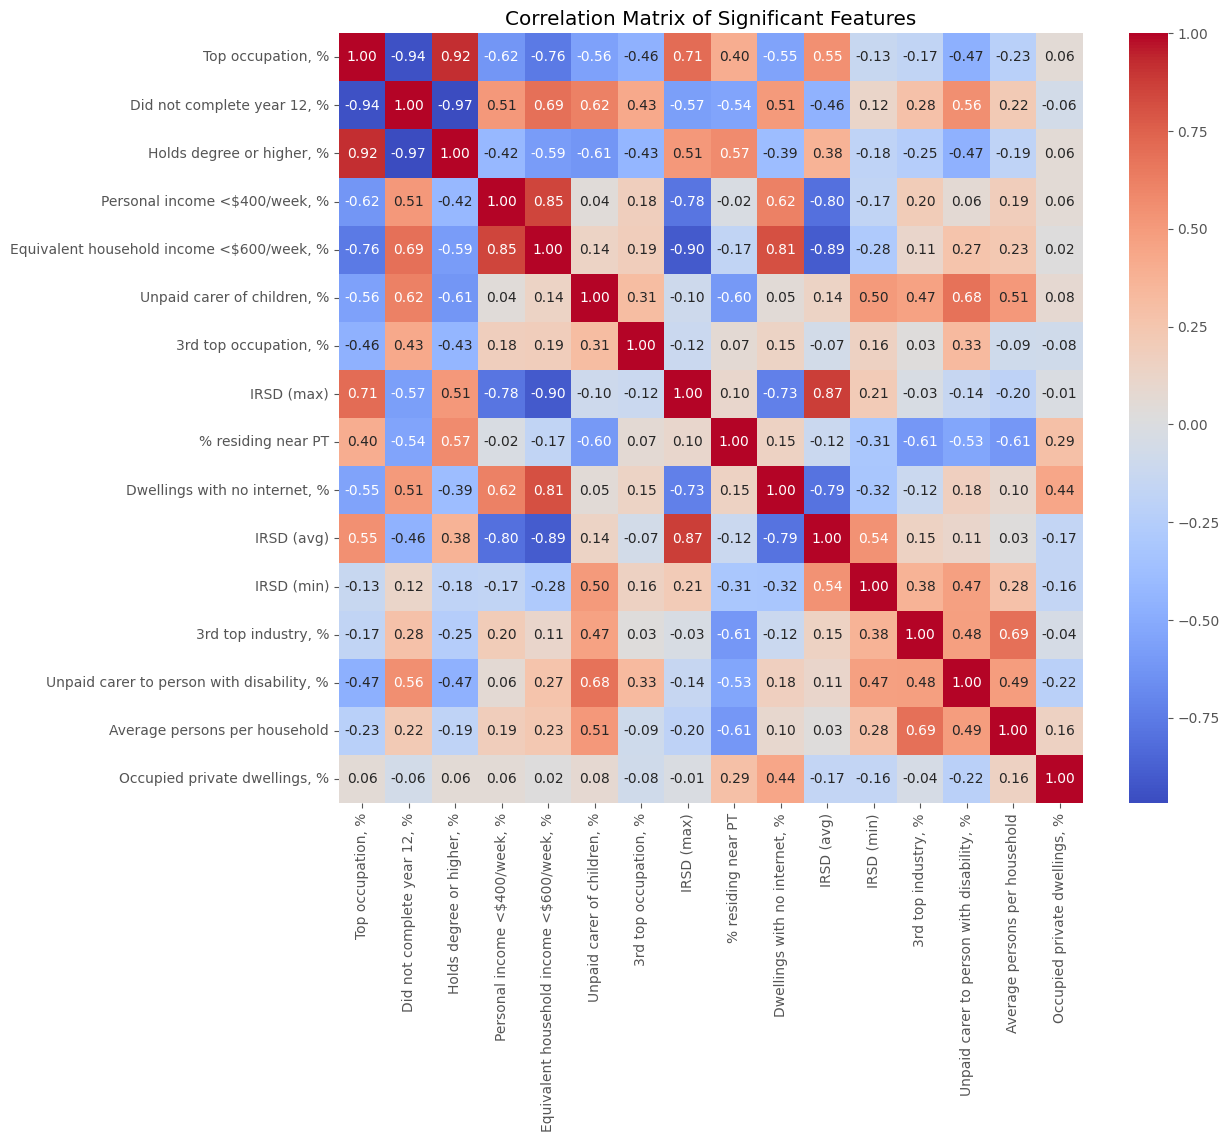

In [5]:
# do a corrplot of the significant features
# Create a DataFrame with the significant features
significant_feats = moran_df[moran_df['P-value'] < 0.05].index
significant_data = socio_data[significant_feats]

# Calculate the correlation matrix
corr = significant_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Significant Features')
plt.show()

In [6]:
# # do a pair plot of the significant features

# sns.pairplot(significant_data)
# plt.suptitle('Pairplot of Significant Features', y=1.02)
# plt.show()


Highly correlated features (Pearson correlation > 0.7 or <-0.7):
[('Top occupation, %', 'Did not complete year 12, %'), ('Top occupation, %', 'Holds degree or higher, %'), ('Top occupation, %', 'Equivalent household income <$600/week, %'), ('Top occupation, %', 'IRSD (max)'), ('Did not complete year 12, %', 'Holds degree or higher, %'), ('Personal income <$400/week, %', 'Equivalent household income <$600/week, %'), ('Personal income <$400/week, %', 'IRSD (max)'), ('Personal income <$400/week, %', 'IRSD (avg)'), ('Equivalent household income <$600/week, %', 'IRSD (max)'), ('Equivalent household income <$600/week, %', 'Dwellings with no internet, %'), ('Equivalent household income <$600/week, %', 'IRSD (avg)'), ('IRSD (max)', 'Dwellings with no internet, %'), ('IRSD (max)', 'IRSD (avg)'), ('Dwellings with no internet, %', 'IRSD (avg)')]
Highly correlated features (Spearman correlation > 0.7 or <-0.7):
[('Top occupation, %', 'Did not complete year 12, %'), ('Top occupation, %', 'Holds deg

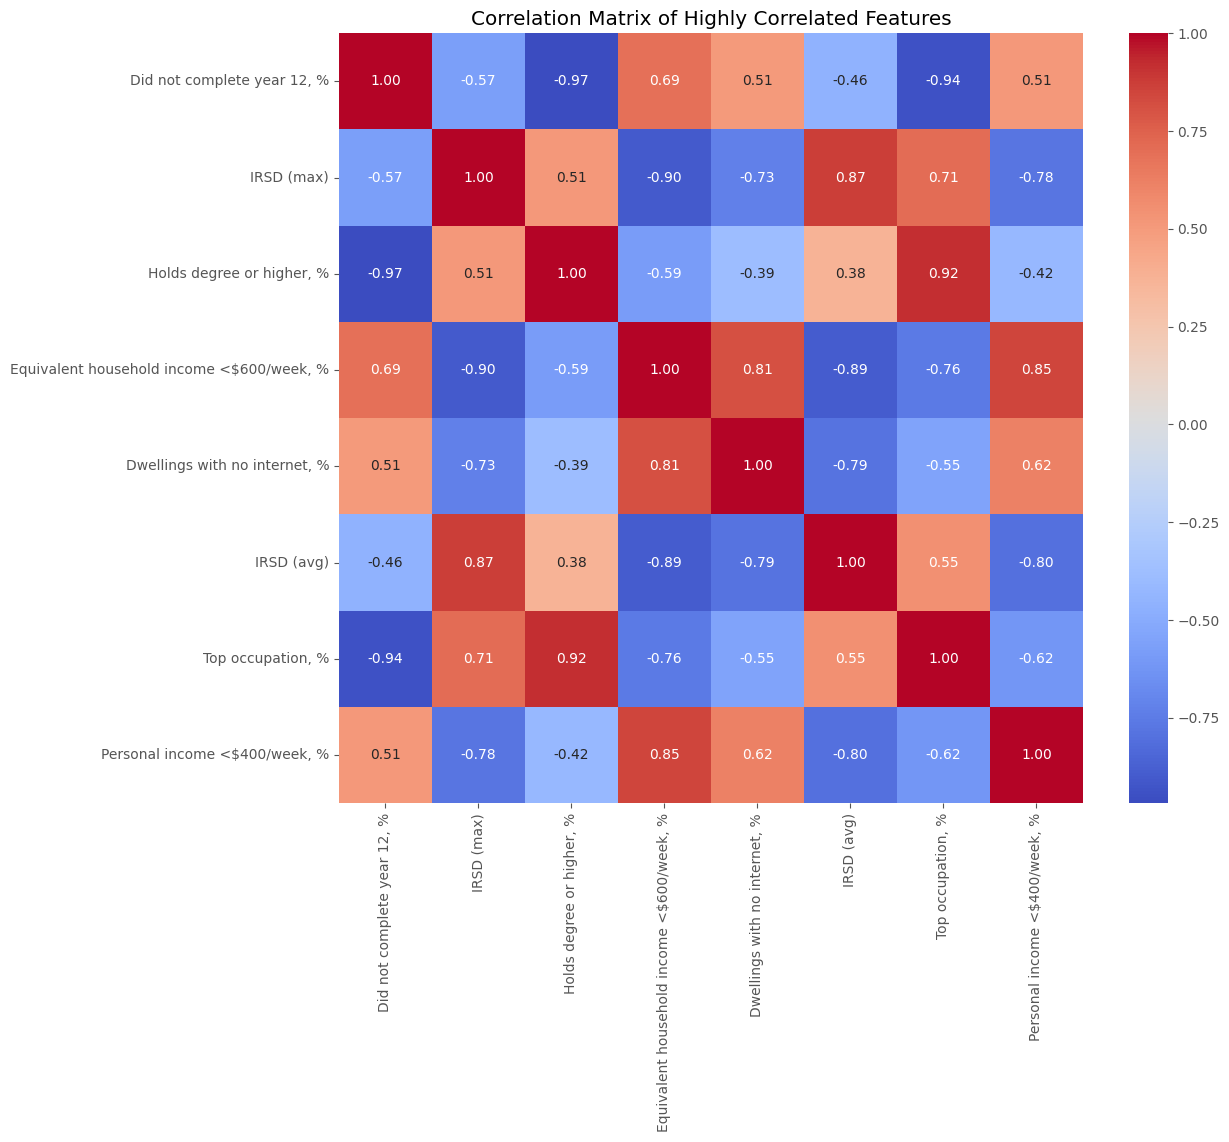

In [ ]:
# print the features that are highly correlated (pearson correlation and spearman correlation > 0.7 or <-0.7)
# Calculate the correlation matrix
corr_pearson = significant_data.corr(method='pearson')
corr_spearman = significant_data.corr(method='spearman')

# Create a mask to display only the lower triangle of the matrix
mask = np.triu(np.ones_like(corr_pearson, dtype=bool))

# Find the highly correlated features
highly_correlated_pearson = (corr_pearson > 0.7) | (corr_pearson < -0.7)
highly_correlated_spearman = (corr_spearman > 0.7) | (corr_spearman < -0.7)

pairs_pearson = []
pairs_spearman = []

for i in range(len(highly_correlated_pearson.columns)):
	for j in range(i+1, len(highly_correlated_pearson.columns)):
		if highly_correlated_pearson.iloc[i, j]:
			pairs_pearson.append((highly_correlated_pearson.columns[i], highly_correlated_pearson.columns[j]))

for i in range(len(highly_correlated_spearman.columns)):
	for j in range(i+1, len(highly_correlated_spearman.columns)):
		if highly_correlated_spearman.iloc[i, j]:
			pairs_spearman.append((highly_correlated_spearman.columns[i], highly_correlated_spearman.columns[j]))


print('Highly correlated features (Pearson correlation > 0.7 or <-0.7):')
print(pairs_pearson)

print('Highly correlated features (Spearman correlation > 0.7 or <-0.7):')
print(pairs_spearman)

# print the length of the pairs
print('Number of highly correlated feature pairs (Pearson):', len(pairs_pearson))
print('Number of highly correlated feature pairs (Spearman):', len(pairs_spearman))


# take the intersection of the highly correlated features from pearson and spearman
# Find the intersection of highly correlated features
intersection = set(pairs_pearson).intersection(set(pairs_spearman))

print('Intersection of highly correlated features (Pearson and Spearman):')
print(intersection)

# print the length of the intersection
print('Number of highly correlated feature pairs (Intersection):', len(intersection))

# prepare a dataframe with the highly correlated features
# Create a DataFrame with the highly correlated features
highly_correlated_columns = list(set([pair[0] for pair in intersection]+[pair[1] for pair in intersection]))
highly_correlated_data = significant_data[highly_correlated_columns]

highly_correlated_data_corr = highly_correlated_data.corr()

# print the number of finally selected features
print('Number of finally selected features:', len(highly_correlated_columns))

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(highly_correlated_data_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Highly Correlated Features')
plt.show()



<Figure size 1500x1500 with 0 Axes>

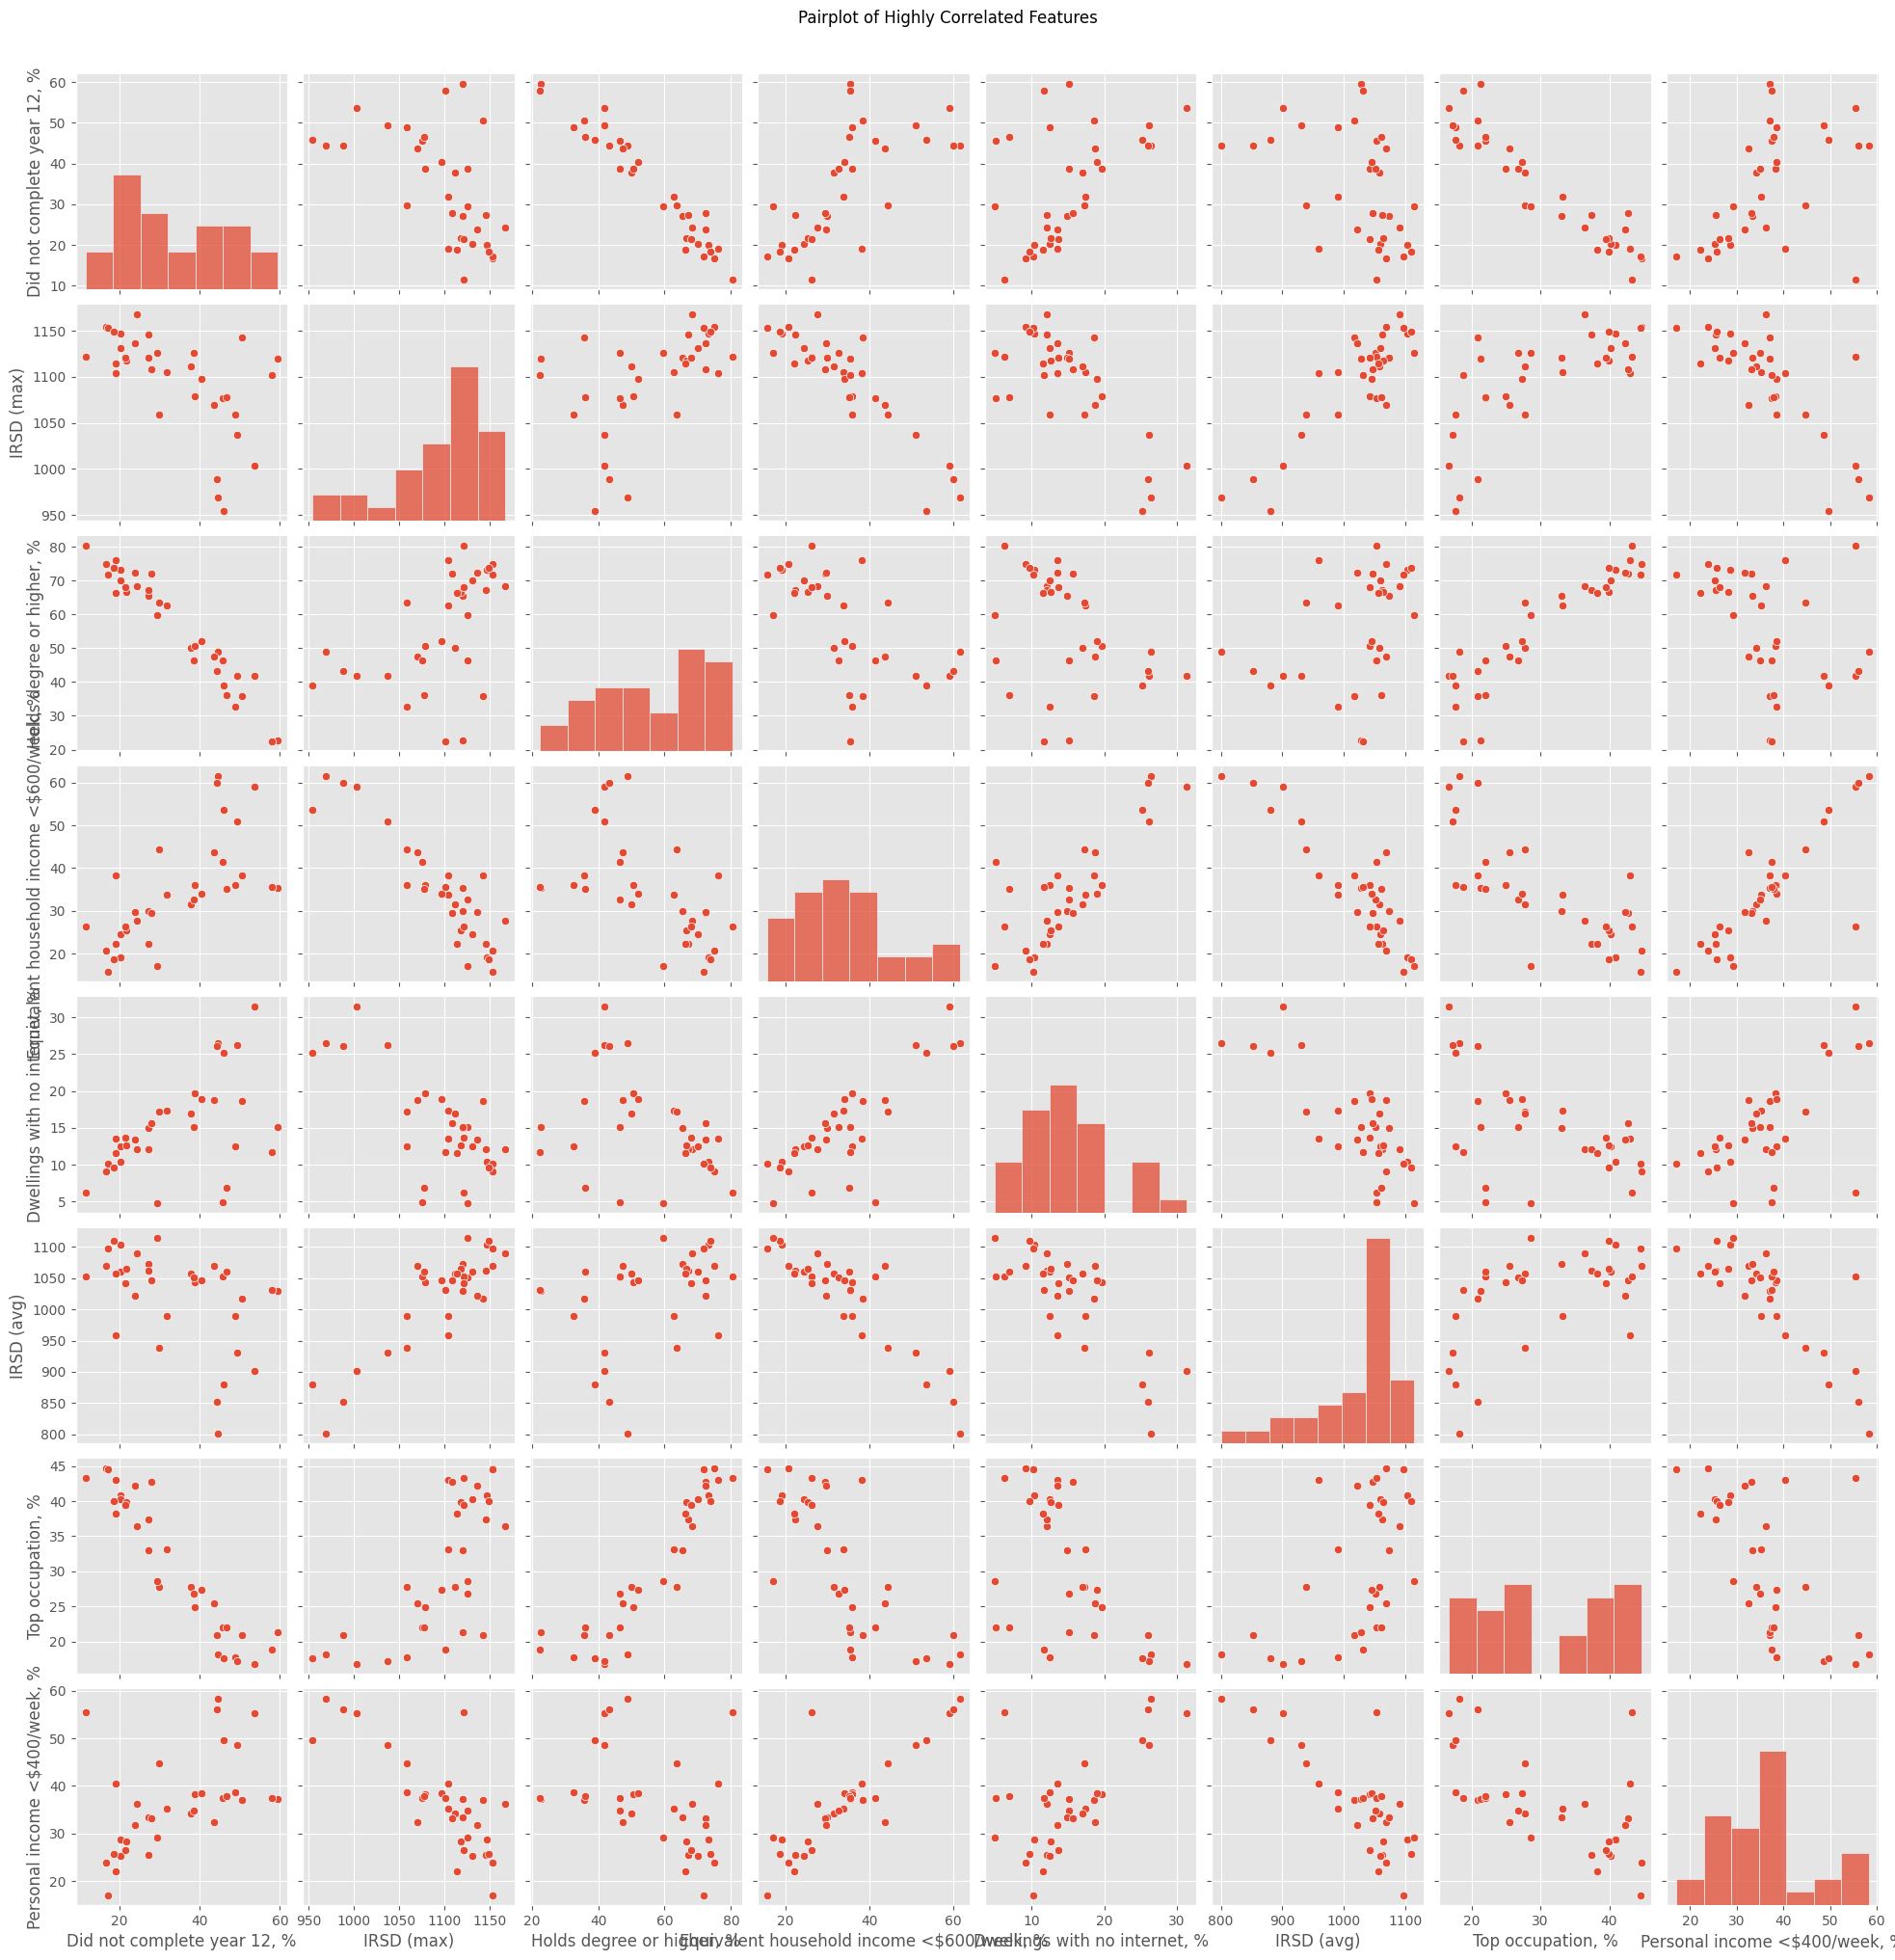

In [8]:
plt.figure(figsize=(15, 15))
# do an sns pairplot of the highly correlated features
sns.pairplot(highly_correlated_data)
plt.suptitle('Pairplot of Highly Correlated Features', y=1.02)
plt.show()

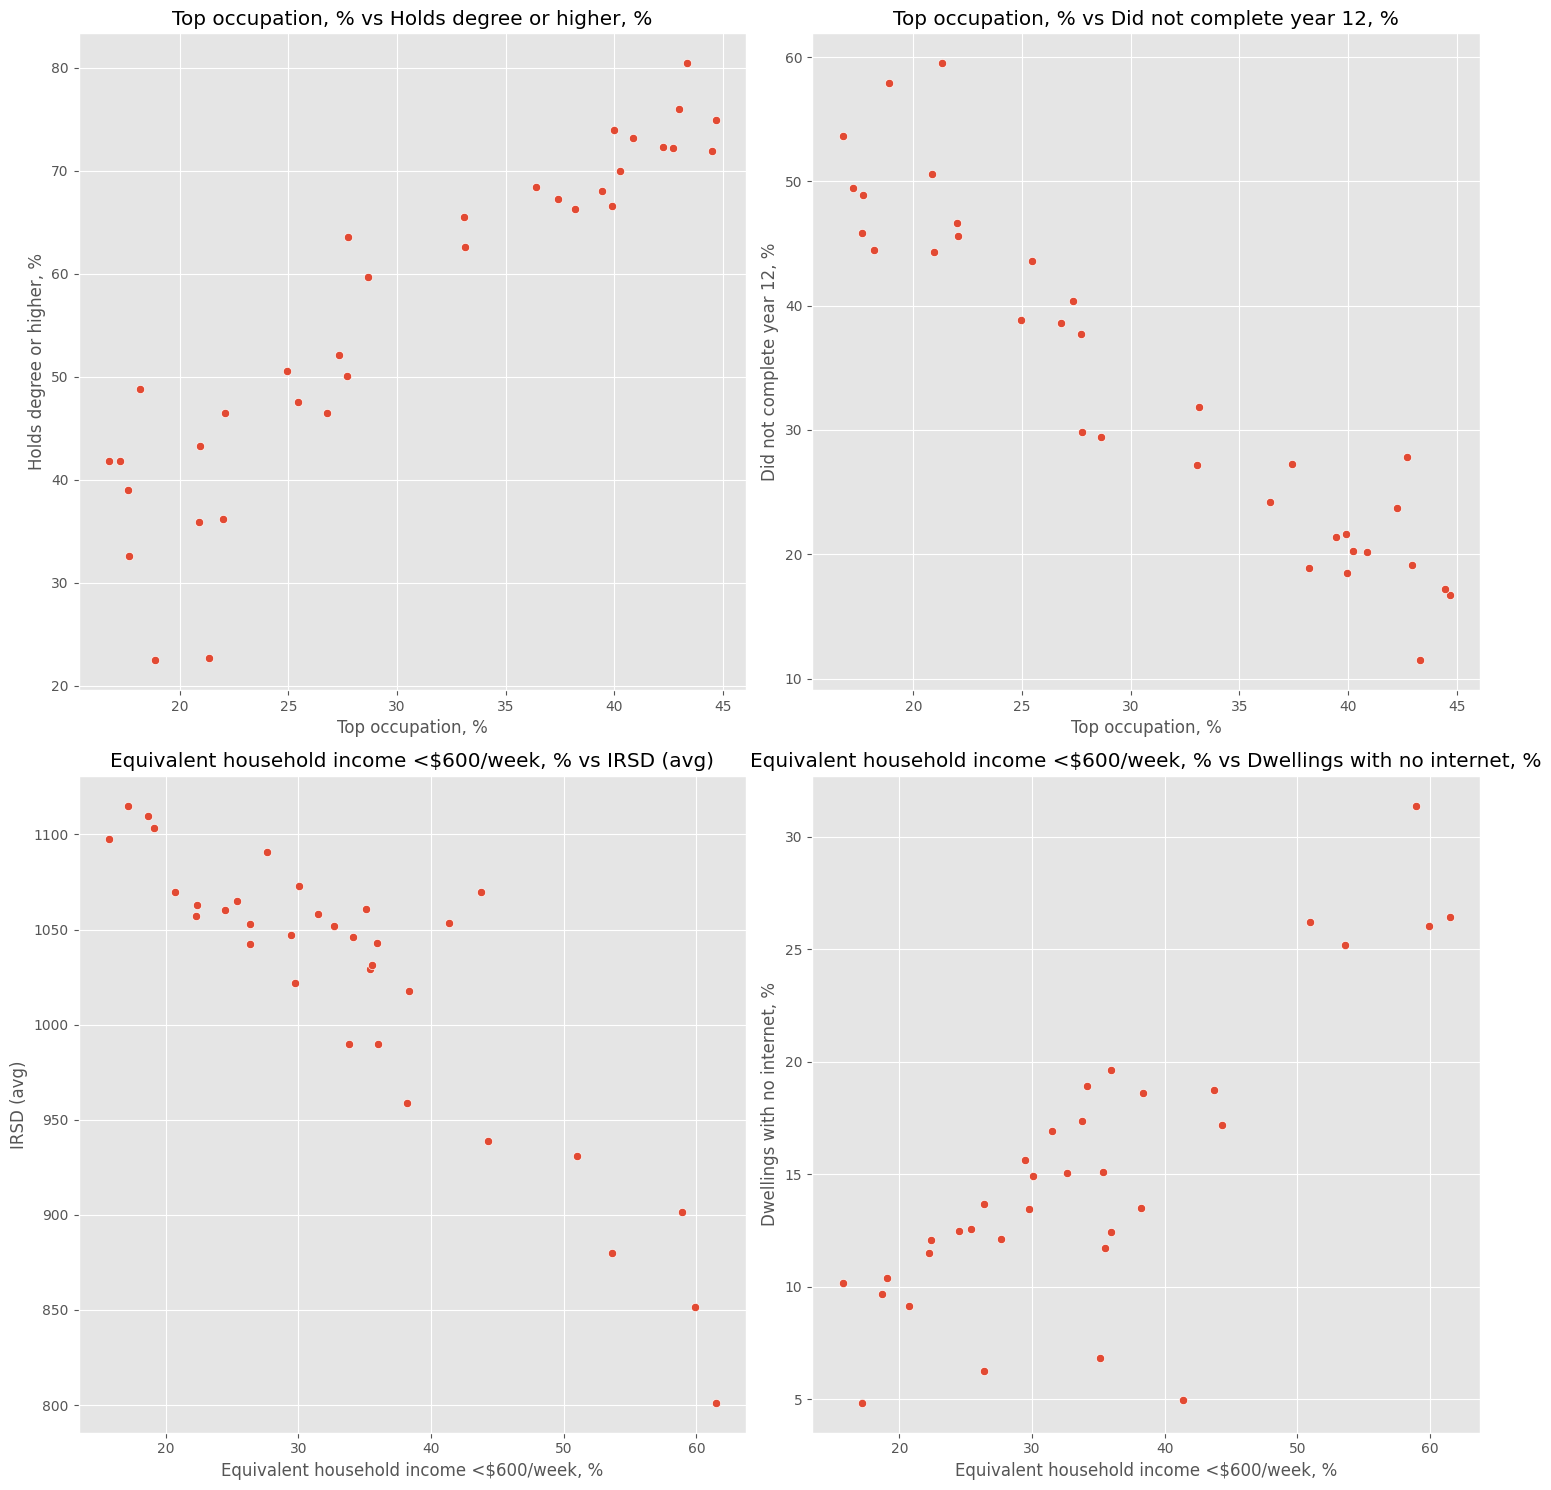

<Figure size 640x480 with 0 Axes>

In [ ]:
final_feature_pairs = [
	('Top occupation, %', 'Holds degree or higher, %'),
	('Top occupation, %', 'Did not complete year 12, %'),
	('Equivalent household income <$600/week, %', 'IRSD (avg)'),
	('Equivalent household income <$600/week, %', 'Dwellings with no internet, %')
]


# do a scatter plot of the final feature pairs, all in one plot
plt.figure(figsize=(15, 15))
for i, (feat1, feat2) in enumerate(final_feature_pairs):
	plt.subplot(2, 2, i+1)
	sns.scatterplot(x=feat1, y=feat2, data=significant_data)
	plt.title(f'{feat1} vs {feat2}')
plt.tight_layout()
plt.savefig('doc/figures/scatterplot_final_feature_pairs.png')
plt.show()
plt.clf()

In [10]:
# # Feature pairs for socio-demographic analysis
# feature_pairs = [
#     ('Equivalent household income <$600/week, %', 'IRSD (avg)'),  # Income and socio-economic disadvantage
#     ('Dwellings with no motor vehicle, %', 'Dwellings with no internet, %'),  # Socio-economic and technological access
#     ('Female-headed lone parent families, %', 'Requires assistance with core activities, %'),  # Family structure and caregiving needs
#     ('Top occupation, %', 'Holds degree or higher, %')  # Occupation and education level
# ]



# plt.figure(figsize=(15, 15))
# for i, (feat1, feat2) in enumerate(feature_pairs):
# 	plt.subplot(2, 2, i+1)
# 	sns.scatterplot(x=feat1, y=feat2, data=significant_data)
# 	plt.title(f'{feat1} vs {feat2}')
# plt.tight_layout()
# # plt.savefig('doc/figures/scatterplot_final_feature_pairs.png')
# plt.show()
# plt.clf()

In [20]:
# Drop rows with NaN values, but keep columns with NaN values
socio_data_no_nan = socio_data[['Dwellings with no motor vehicle, %','% residing near PT']].dropna(axis=0, how='any')


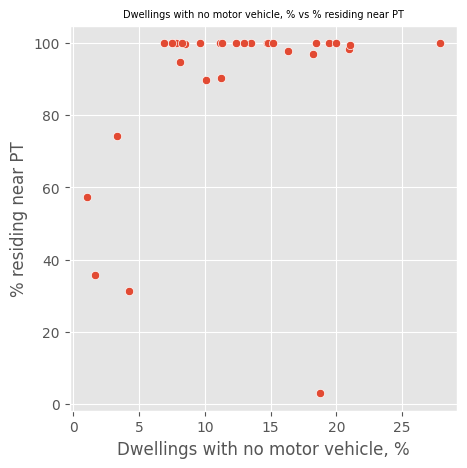

In [21]:
# plot 'Dwellings with no motor vehicle, %', vs '% residing near PT' 
plt.figure(figsize=(5, 5))
sns.scatterplot(x='Dwellings with no motor vehicle, %', y='% residing near PT', data=socio_data_no_nan)
plt.title('Dwellings with no motor vehicle, % vs % residing near PT', fontsize=7)
plt.show()

In [28]:
# re-create the weights matrix with the new data
# Create KNN weights with k=8 and row-standardize, but this time with the new data
# select the subset of 'data' that corresponds to the subset of 'socio_data_no_nan'
data_no_nan = data.loc[socio_data_no_nan.index]

# GeoDataFrame creation with geometry based on coordinates
gdf_no_nan = gpd.GeoDataFrame(data_no_nan, geometry=gpd.points_from_xy(data_no_nan['cart_x'], data_no_nan['cart_y']))

# Create KNN weights with k=8 and row-standardize
w_no_nan = weights.KNN.from_dataframe(gdf_no_nan, k=8)
w_no_nan.transform = 'R'  # Row-standardization



In [29]:
from pysal.model import spreg

# Define the variables
y = socio_data_no_nan['% residing near PT'].values
X = socio_data_no_nan['Dwellings with no motor vehicle, %'].values.reshape(-1, 1)

# Fit the spatial durbin model
# based as below
# model = spreg.ML_Lag(y, X, w, name_y='Category 4 & 5 emergency department presentations, %', name_x=['Distance to nearest public hospital with emergency department'], name_w='KNN', name_ds='Hospital Data',slx_lags=1)
model = spreg.ML_Lag(y, X, w_no_nan, name_y='% residing near PT', name_x=['Dwellings with no motor vehicle, %'], name_w='KNN', name_ds='Socio-demographic Data',slx_lags=1)

# Print the summary of the model
print(model.summary)


REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG WITH SLX - SPATIAL DURBIN MODEL (METHOD = FULL)
-------------------------------------------------------------------------------------------------
Data set            :Socio-demographic Data
Weights matrix      :         KNN
Dependent Variable  :% residing near PT                Number of Observations:          32
Mean dependent var  :     89.6478                Number of Variables   :           4
S.D. dependent var  :     23.8256                Degrees of Freedom    :          28
Pseudo R-squared    :      0.1919
Spatial Pseudo R-squared:  0.1306
Log likelihood      :   -143.4283
Sigma-square ML     :    446.6421                Akaike info criterion :     294.857
S.E of regression   :     21.1339                Schwarz criterion     :     300.720

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic

In [23]:
# find number of NaN in y and X

print('Number of NaN in y:', np.isnan(y).sum())
print('Number of NaN in X:', np.isnan(X).sum())
print('Length of y:', len(y))
print('Length of X:', len(X))

Number of NaN in y: 0
Number of NaN in X: 0
Length of y: 32
Length of X: 32


In [25]:
# print dtype of y and X
print('dtype of y:', y.dtype)
print('dtype of X:', X.dtype)

dtype of y: float64
dtype of X: float64


<Figure size 1000x1000 with 0 Axes>

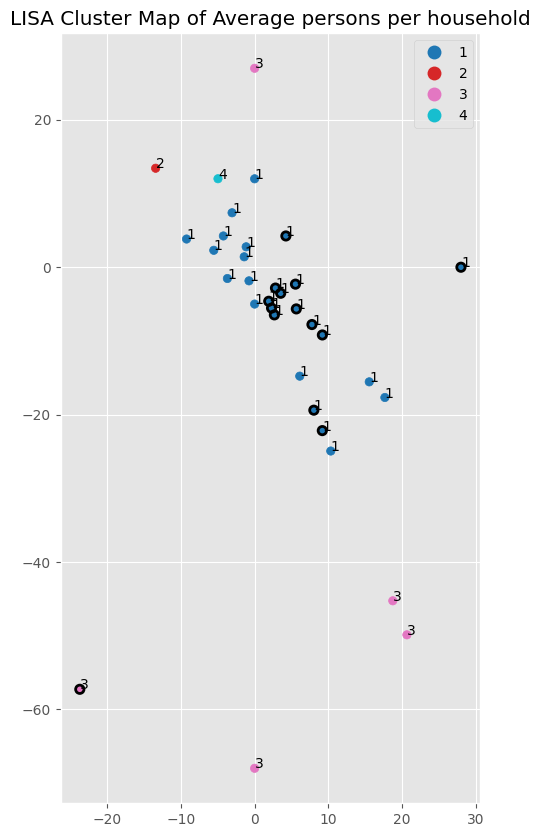

Significant clusters:
   Community Name  lisa_cluster
3         Croydon             1
7    Malvern East             1
8         Malvern             1
10        Mentone             1
12     Mordialloc             1
13    Murrumbeena             1
16      Northcote             1
20        Prahran             1
22       Sorrento             3
24    South Yarra             1
27  St Kilda East             1
28       St Kilda             1
30         Toorak             1
33        Windsor             1
Statistics of significant clusters:
              count       mean      std       min        25%        50%  \
lisa_cluster                                                              
1              13.0  99.546968  1.42913  94.81045  99.999994  100.00000   
3               1.0  57.230290      NaN  57.23029  57.230290   57.23029   

                    75%        max  
lisa_cluster                        
1             100.00000  100.00000  
3              57.23029   57.23029  
Mean distance

In [ ]:
# do a LISA analysis to see if there are any spatial patterns

w_new = weights.KNN.from_dataframe(gdf, k=8)
moran_local = Moran_Local(data['% residing near PT'], w_new, permutations=9999)
lisa_cluster = moran_local.q
lisa_cluster

# plot the LISA cluster map
plt.figure(figsize=(10, 10))
gdf['lisa_cluster'] = lisa_cluster
gdf.plot(column='lisa_cluster', categorical=True, legend=True, figsize=(10, 10))
plt.title('LISA Cluster Map of Average persons per household')
# annotate with cluster labels
for idx, row in gdf.iterrows():
	plt.annotate(row['lisa_cluster'], (row['cart_x'], row['cart_y']), color='black')

# mark the significant clusters if p<0.05
sig = moran_local.p_sim < 0.05
gdf['significant'] = sig
gdf_sig = gdf[gdf['significant']]
gdf_sig.plot(ax=plt.gca(), color='none', edgecolor='black', linewidth=2)

plt.show()

# print the values of the significant clusters
print('Significant clusters:')
print(gdf_sig[['Community Name', 'lisa_cluster']])
# print statistics of the significant clusters
print('Statistics of significant clusters:')
print(gdf_sig.groupby('lisa_cluster')['% residing near PT'].describe())

# compute mean distance from GPO for each significant cluster
# distance from GPO is given by the 'Distance to GPO (km)' column

# Compute the mean distance from GPO for each significant cluster
mean_distance = gdf_sig.groupby('lisa_cluster')['Distance to GPO (km)'].mean()
print('Mean distance from GPO for each significant cluster:')
print(mean_distance)


In [ ]:
import matplotlib.pyplot as plt
from esda import Moran_Local
from libpysal import weights

def lisa_analysis(gdf, feature_name):
	# Generate spatial weights matrix (KNN)
	w_new = weights.KNN.from_dataframe(gdf, k=8)
	
	# Perform Moran's I local analysis
	moran_local = Moran_Local(gdf[feature_name], w_new, permutations=9999)
	
	# Get LISA cluster values
	lisa_cluster = moran_local.q
	gdf['lisa_cluster'] = lisa_cluster
	
	# Plot the LISA cluster map
	plt.figure(figsize=(10, 10))
	gdf.plot(column='lisa_cluster', categorical=True, legend=True, figsize=(10, 10))
	plt.title(f'LISA Cluster Map of {feature_name}')
	
	# Annotate with cluster labels
	for idx, row in gdf.iterrows():
		plt.annotate(row['lisa_cluster'], (row['cart_x'], row['cart_y']), color='black')

	# Mark the significant clusters if p<0.05
	sig = moran_local.p_sim < 0.05
	gdf['significant'] = sig
	gdf_sig = gdf[gdf['significant']]
	
	# Plot significant clusters
	gdf_sig.plot(ax=plt.gca(), color='none', edgecolor='black', linewidth=2)
	plt.show()

	# Print the significant clusters
	print('Significant clusters:')
	print(gdf_sig[['Community Name', 'lisa_cluster']])
	
	# Print statistics of the significant clusters
	print('Statistics of significant clusters:')
	print(gdf_sig.groupby('lisa_cluster')[feature_name].describe())

	# Compute mean distance from GPO for each significant cluster
	mean_distance = gdf_sig.groupby('lisa_cluster')['Distance to GPO (km)'].mean()
	print(f'Mean distance from GPO for each significant cluster:')
	print(mean_distance)

# Usage example:
# lisa_analysis(gdf, '% residing near PT')


<Figure size 1000x1000 with 0 Axes>

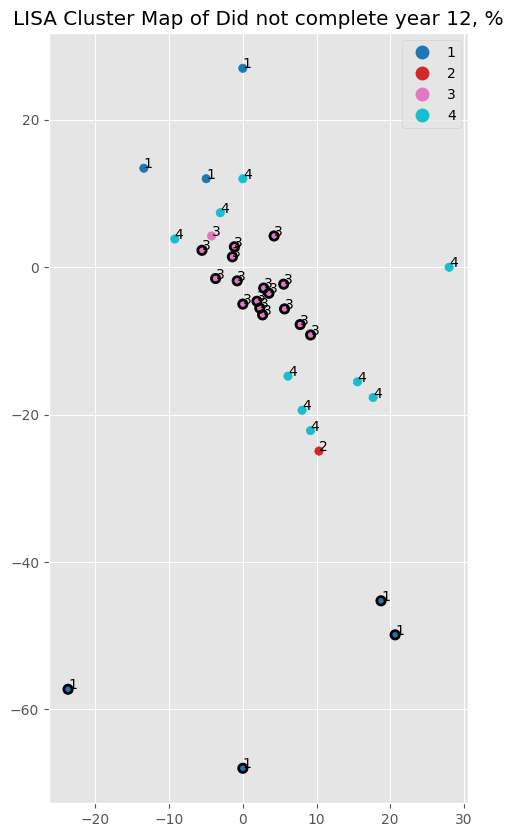

Significant clusters:
      Community Name  lisa_cluster
5          Footscray             3
7       Malvern East             3
8            Malvern             3
13       Murrumbeena             3
15   North Melbourne             3
16         Northcote             3
17         Parkville             3
19    Port Melbourne             3
20           Prahran             3
21        Somerville             1
22          Sorrento             1
23   South Melbourne             3
24       South Yarra             3
26  St Andrews Beach             1
27     St Kilda East             3
28          St Kilda             3
29     St Kilda West             3
30            Toorak             3
31             Tyabb             1
33           Windsor             3
Statistics of significant clusters:
              count       mean       std        min        25%        50%  \
lisa_cluster                                                                
1               4.0  52.408659  7.300328  45.611157  

In [75]:
lisa_analysis(gdf, 'Did not complete year 12, %')

<Figure size 1000x1000 with 0 Axes>

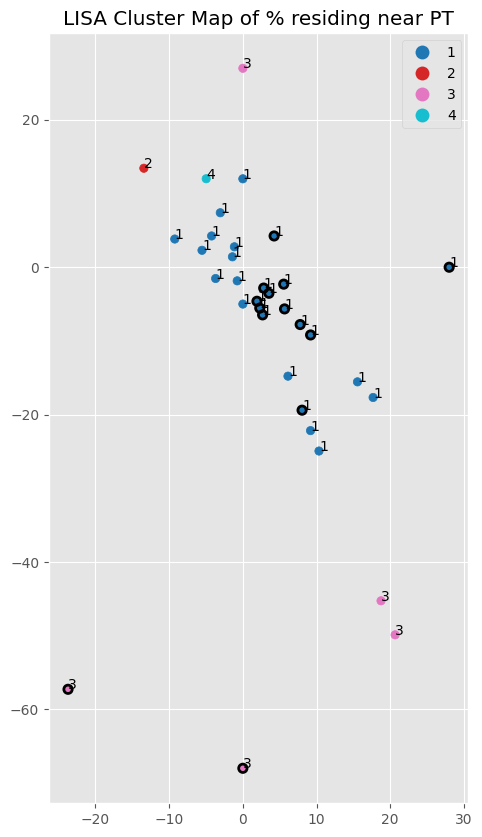

Significant clusters:
      Community Name  lisa_cluster
3            Croydon             1
7       Malvern East             1
8            Malvern             1
10           Mentone             1
13       Murrumbeena             1
16         Northcote             1
20           Prahran             1
22          Sorrento             3
24       South Yarra             1
26  St Andrews Beach             3
27     St Kilda East             1
28          St Kilda             1
30            Toorak             1
33           Windsor             1
Statistics of significant clusters:
              count       mean        std        min        25%        50%  \
lisa_cluster                                                                 
1              12.0  99.536789   1.492186  94.810450  99.999999  100.00000   
3               2.0  43.539950  19.361064  29.849611  36.694781   43.53995   

                    75%        max  
lisa_cluster                        
1             100.00000  100.0

In [77]:
lisa_analysis(gdf, '% residing near PT')

<Figure size 1000x1000 with 0 Axes>

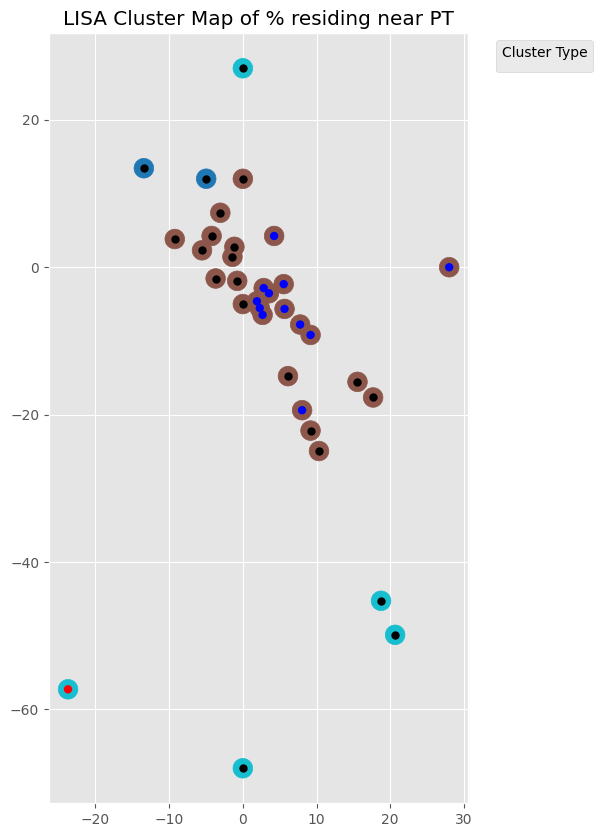

Significant clusters (high-high and low-low):
   Community Name  lisa_cluster
3         Croydon             1
7    Malvern East             1
8         Malvern             1
10        Mentone             1
13    Murrumbeena             1
16      Northcote             1
20        Prahran             1
22       Sorrento             3
24    South Yarra             1
27  St Kilda East             1
28       St Kilda             1
30         Toorak             1
33        Windsor             1
Statistics of significant clusters:
              count       mean       std       min        25%        50%  \
lisa_cluster                                                               
1              12.0  99.536789  1.492186  94.81045  99.999999  100.00000   
3               1.0  57.230290       NaN  57.23029  57.230290   57.23029   

                    75%        max  
lisa_cluster                        
1             100.00000  100.00000  
3              57.23029   57.23029  
Mean distance fro

In [ ]:
import matplotlib.pyplot as plt
from esda import Moran_Local
from libpysal import weights

def lisa_analysis(gdf, feature_name):
	# Generate spatial weights matrix (KNN)
	w_new = weights.KNN.from_dataframe(gdf, k=8)
	
	# Perform Moran's I local analysis
	moran_local = Moran_Local(gdf[feature_name], w_new, permutations=9999)
	
	# Get LISA cluster values
	lisa_cluster = moran_local.q
	gdf['lisa_cluster'] = lisa_cluster
	
	# Get significance of clusters (p-value < 0.05)
	sig = moran_local.p_sim < 0.05
	gdf['significant'] = sig
	
	# Color map for high-high and low-low clusters
	color_map = {1: 'blue', 3: 'red'}  # Low-low = blue, High-high = red
	
	# Assign colors based on cluster type and significance
	gdf['color'] = gdf['lisa_cluster'].apply(lambda x: color_map.get(x, 'black') if gdf.loc[gdf['lisa_cluster'] == x, 'significant'].any() else 'black')
	
	# Plot the LISA cluster map with updated color
	plt.figure(figsize=(10, 10))
	gdf.plot(column='color', legend=True, figsize=(10, 10), legend_kwds={'title': "Cluster Type"})
	plt.title(f'LISA Cluster Map of {feature_name}')
	
	# Plot significant clusters (high-high and low-low)
	sig_clusters = gdf[gdf['significant'] & gdf['color'].isin(['red', 'blue'])]
	sig_clusters.plot(ax=plt.gca(), color=sig_clusters['color'], edgecolor='black', linewidth=0.001)

	# Plot non-significant areas in black
	non_sig_clusters = gdf[~gdf['significant']]
	non_sig_clusters.plot(ax=plt.gca(), color='black', edgecolor='black', linewidth=0.001)

	# Adjust legend orientation using matplotlib
	handles, labels = plt.gca().get_legend_handles_labels()
	plt.legend(handles, labels, title="Cluster Type", bbox_to_anchor=(1.05, 1), loc='upper left')

	# Show plot
	plt.show()

	# Print the significant clusters
	print('Significant clusters (high-high and low-low):')
	print(sig_clusters[['Community Name', 'lisa_cluster']])
	
	# Print statistics of the significant clusters
	print('Statistics of significant clusters:')
	print(sig_clusters.groupby('lisa_cluster')[feature_name].describe())

	# Compute mean distance from GPO for each significant cluster
	mean_distance = sig_clusters.groupby('lisa_cluster')['Distance to GPO (km)'].mean()
	print(f'Mean distance from GPO for each significant cluster:')
	print(mean_distance)

# Usage example:
lisa_analysis(gdf, '% residing near PT')


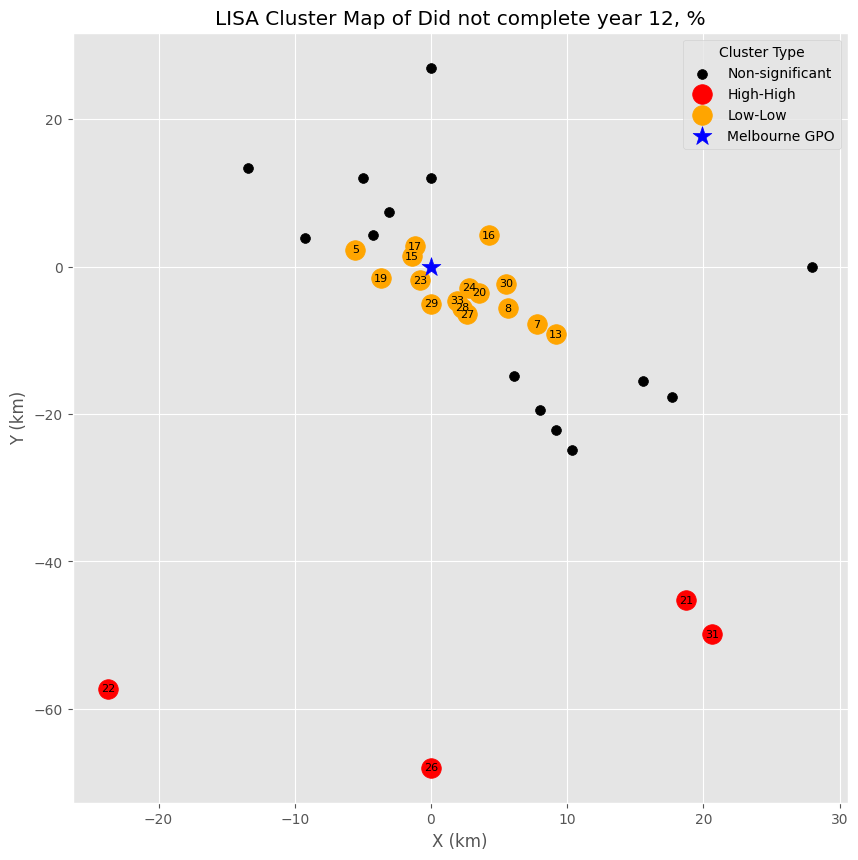

Statistics of significant clusters:
              count       mean       std        min        25%        50%  \
lisa_cluster                                                                
1               4.0  52.408659  7.300328  45.611157  46.378751  52.258799   
3              16.0  21.591409  4.862772  11.464140  18.808004  20.807395   

                    75%        max  
lisa_cluster                        
1             58.288707  59.505879  
3             24.960115  29.842400  
Mean distance from GPO for each significant cluster:
lisa_cluster
1    85.167622
3     7.304269
Name: Distance to GPO (km), dtype: float64


In [114]:
import matplotlib.pyplot as plt
import numpy as np
from esda import Moran_Local
from libpysal import weights

def lisa_analysis(gdf, feature_name):
	np.random.seed(42)
	# Generate spatial weights matrix (KNN)
	w_new = weights.KNN.from_dataframe(gdf, k=8)
	
	# Perform Moran's I local analysis
	moran_local = Moran_Local(gdf[feature_name], w_new, permutations=9999)
	
	# Get LISA cluster values
	lisa_cluster = moran_local.q
	gdf['lisa_cluster'] = lisa_cluster
	
	# Get significance of clusters (p-value < 0.05)
	sig = moran_local.p_sim < 0.05
	gdf['significant'] = sig
	
	# Create the color map: High-High = red, Low-Low = orange, others = black
	color_map = {1: 'red', 3: 'orange'}  # Low-low = orange, High-high = red
	gdf['color'] = gdf['lisa_cluster'].apply(lambda x: color_map.get(x, 'black') if gdf.loc[gdf['lisa_cluster'] == x, 'significant'].any() else 'black')
	
	# Extract coordinates for plotting
	x = gdf.geometry.x
	y = gdf.geometry.y
	
	# Plot using matplotlib, color points based on cluster
	plt.figure(figsize=(10, 10))
	
	# Plot all points in black first (non-significant)
	plt.scatter(x[~gdf['significant']], y[~gdf['significant']], color='black', label='Non-significant', s=50)
	
	# Plot significant points, color them by their cluster (high-high = red, low-low = orange)
	plt.scatter(x[gdf['significant'] & (gdf['color'] == 'red')], 
				y[gdf['significant'] & (gdf['color'] == 'red')], color='red', label='High-High', s=200)
	plt.scatter(x[gdf['significant'] & (gdf['color'] == 'orange')], 
				y[gdf['significant'] & (gdf['color'] == 'orange')], color='orange', label='Low-Low', s=200)

	plt.title(f'LISA Cluster Map of {feature_name}')
	plt.xlabel('X (km)')
	plt.ylabel('Y (km)')
	plt.scatter(0, 0, color='blue', marker='*', s=200, label='Melbourne GPO')

	# Adjust the legend and make it horizontal
	plt.legend(loc='upper right', bbox_to_anchor=(1, 1), title="Cluster Type")
	
	# annotate the suburbs with their index
	for i, txt in enumerate(gdf['Community Name']):
		# Only annotate significant points
		if gdf.loc[i, 'significant']:
			plt.annotate(i, (x[i], y[i]), fontsize=8, va='center', ha='center')

	# plot the origin as a star
	

	# Show plot
	plt.show()

	# Print statistics of the significant clusters
	print('Statistics of significant clusters:')
	print(gdf[gdf['significant']].groupby('lisa_cluster')[feature_name].describe())

	# Compute mean distance from GPO for each significant cluster
	mean_distance = gdf[gdf['significant']].groupby('lisa_cluster')['Distance to GPO (km)'].mean()
	print(f'Mean distance from GPO for each significant cluster:')
	print(mean_distance)

# Usage example:
lisa_analysis(gdf, 'Did not complete year 12, %')


In [120]:
from pysal.model import spreg

socio_no_nan=data[['Dwellings with no motor vehicle, %','Equivalent household income <$600/week, %']].dropna(axis=0, how='any')


data_no_nan = data.loc[socio_no_nan.index]

# GeoDataFrame creation with geometry based on coordinates
gdf_no_nan = gpd.GeoDataFrame(data_no_nan, geometry=gpd.points_from_xy(data_no_nan['cart_x'], data_no_nan['cart_y']))

# Create KNN weights with k=8 and row-standardize
w_no_nan = weights.KNN.from_dataframe(gdf_no_nan, k=8)
w_no_nan.transform = 'R'  # Row-standardization

# Define the variables
y = socio_no_nan['Equivalent household income <$600/week, %'].values
X = socio_no_nan['Dwellings with no motor vehicle, %'].values.reshape(-1, 1)

# Fit the spatial durbin model
# based as below
# model = spreg.ML_Lag(y, X, w, name_y='Category 4 & 5 emergency department presentations, %', name_x=['Distance to nearest public hospital with emergency department'], name_w='KNN', name_ds='Hospital Data',slx_lags=1)
model = spreg.ML_Lag(y, X, w_no_nan, name_y='Equivalent household income <$600/week, %', name_x=['Dwellings with no motor vehicle, %'], name_w='KNN', name_ds='Socio-demographic Data',slx_lags=1)

# Print the summary of the model
print(model.summary)


REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG WITH SLX - SPATIAL DURBIN MODEL (METHOD = FULL)
-------------------------------------------------------------------------------------------------
Data set            :Socio-demographic Data
Weights matrix      :         KNN
Dependent Variable  :Equivalent household income <$600/week, %                Number of Observations:          32
Mean dependent var  :     34.5068                Number of Variables   :           4
S.D. dependent var  :     12.2315                Degrees of Freedom    :          28
Pseudo R-squared    :      0.5050
Spatial Pseudo R-squared:  0.0216
Log likelihood      :   -116.3945
Sigma-square ML     :     76.3543                Akaike info criterion :     240.789
S.E of regression   :      8.7381                Schwarz criterion     :     246.652

------------------------------------------------------------------------------------
            Variable     Coefficient       St

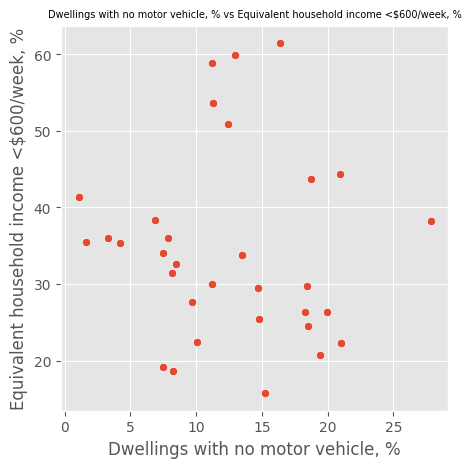

In [121]:
# do a scatter plot
plt.figure(figsize=(5, 5))
sns.scatterplot(x='Dwellings with no motor vehicle, %', y='Equivalent household income <$600/week, %', data=socio_no_nan)
plt.title('Dwellings with no motor vehicle, % vs Equivalent household income <$600/week, %', fontsize=7)
plt.show()